In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Feature Engineering

## Fill Na

In [3]:
def fill_na(df):
    df.Alley.fillna('No Alley',inplace=True)
    df.LotFrontage.fillna(0,inplace=True)
    df.BsmtQual.fillna('No Basement',inplace=True)
    df.BsmtCond.fillna('No Basement',inplace=True)
    df.BsmtExposure.fillna('No Basement',inplace=True)

    df.BsmtFinSF1[df.BsmtFinType1.isnull()] = 0
    df.BsmtFinSF2[df.BsmtFinType2.isnull()] = 0

    df.BsmtFinType1.fillna('No Basement',inplace=True)
    df.BsmtFinType2.fillna('No Basement',inplace=True)
    df.FireplaceQu.fillna('No Fireplace',inplace=True)
    df.GarageType.fillna('No Garage',inplace=True)
    df.GarageYrBlt.fillna('No Garage',inplace=True)
    df.GarageFinish.fillna('No Garage',inplace=True)
    df.GarageQual.fillna('No Garage',inplace=True)
    df.GarageCond.fillna('No Garage',inplace=True)
    df.PoolQC.fillna('No Pool',inplace=True)
    df.Fence.fillna('No Fence',inplace=True)
    df.MiscFeature.fillna('No Misc',inplace=True)

    df.drop('Utilities',inplace=True,axis=1)

    df.MasVnrType.fillna(df.MasVnrType.mode()[0],inplace=True)
    df.MasVnrArea.fillna(df.MasVnrArea.mode()[0],inplace=True)
    df.Electrical.fillna(df.Electrical.mode()[0],inplace=True)
fill_na(df)

C:\Users\Hanyu Zou\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hanyu Zou\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [4]:
def test(x):
    print(x.value_counts())
    print(x.isnull().sum()/len(df))

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No Misc,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No Misc,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,No Misc,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,No Misc,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,No Misc,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Pool,No Fence,No Misc,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No Alley,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No Pool,MnPrv,No Misc,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No Alley,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No Alley,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0

## New Features

In [6]:
df['Month_sold'] = df.apply(lambda x: round((datetime.date(2020,1,1)-datetime.date(x.YrSold,x.MoSold,1)).days/30),axis=1)
df.drop(['YrSold','MoSold'],axis=1, inplace=True)
df['House_Duration'] = df.apply(lambda x: round((datetime.date(2020,1,1)-datetime.date(x.YearBuilt,1,1)).days/360),axis=1)
df.drop('YearBuilt',axis=1, inplace=True)
df['Replenish_Duration'] = df.apply(lambda x: round((datetime.date(2020,1,1)-datetime.date(x.YearRemodAdd,1,1)).days/360),axis=1)
df.drop('YearRemodAdd',axis=1, inplace=True)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
def get_finished_bsmt_pct(x):
    try:
        return (x.BsmtFinSF1+x.BsmtFinSF2)/x.TotalBsmtSF
    except:
        return 0
df['BsmtFin_pct'] = df.apply(lambda x:get_finished_bsmt_pct(x),axis=1)

def get_average_car_area(x):
    try:
        return x.GarageArea/x.GarageCars
    except:
        return 0
df['Car_Area_Average'] = df.apply(lambda x: get_average_car_area(x),axis=1)



## Transforming

### num2str

In [7]:
df.drop('Id',axis=1,inplace=True)
df.MSSubClass = df.MSSubClass.apply(lambda x: str(x))
df.OverallCond = df.OverallCond.apply(lambda x: str(x))
df.OverallQual = df.OverallQual.apply(lambda x: str(x))
# df.MoSold = df.MoSold.apply(lambda x: str(x))
# df.YrSold = df.YrSold.apply(lambda x: str(x))

### Box-Cox to highly-skewed features

In [8]:
skewness = df[df.dtypes[df.dtypes != "object"].index].apply(lambda x: skew(x))
skewness.drop('SalePrice',inplace=True)
skewness_features = skewness[skewness>0.75].index
df[skewness_features] = boxcox1p(df[skewness_features], 0.15)

## Dummy Variables & Drop

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Month_sold,House_Duration,Replenish_Duration,TotalSF,BsmtFin_pct,Car_Area_Average
0,60,RL,65.0,19.212182,Pave,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,Gd,TA,PConc,Gd,TA,No,GLQ,11.170327,Unf,0.0,7.483296,11.692623,GasA,Ex,Y,SBrkr,11.692623,11.686189,0.0,13.698888,1,0.000000,2,1,3,0.730463,Gd,8,Typ,0,No Fireplace,Attchd,2003,RFn,2,548,TA,TA,Y,0.000000,5.714669,0.000000,0.0,0.0,0.0,No Pool,No Fence,No Misc,0.0,WD,Normal,208500,145,17,17,14.976591,0.824766,274.000000
1,20,RL,80.0,19.712205,Pave,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,12.062832,Unf,0.0,8.897844,12.792276,GasA,Ex,Y,SBrkr,12.792276,0.000000,0.0,12.792276,0,0.730463,2,0,3,0.730463,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,9.010206,0.000000,0.000000,0.0,0.0,0.0,No Pool,No Fence,No Misc,0.0,WD,Normal,181500,154,45,45,14.923100,0.774960,230.000000
2,60,RL,68.0,20.347241,Pave,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,Gd,TA,PConc,Gd,TA,Mn,GLQ,10.200343,Unf,0.0,9.917060,11.892039,GasA,Ex,Y,SBrkr,11.892039,11.724598,0.0,13.832085,1,0.000000,2,1,3,0.730463,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0.000000,5.053371,0.000000,0.0,0.0,0.0,No Pool,No Fence,No Misc,0.0,WD,Normal,223500,138,19,18,15.149678,0.528261,304.000000
3,70,RL,60.0,19.691553,Pave,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,8.274266,Unf,0.0,10.468500,11.354094,GasA,Gd,Y,SBrkr,12.013683,11.354094,0.0,13.711364,1,0.000000,1,0,3,0.730463,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0.000000,4.745132,8.797736,0.0,0.0,0.0,No Pool,No Fence,No Misc,0.0,WD,Abnorml,140000,169,107,51,14.857121,0.285714,214.000000
4,60,RL,84.0,21.325160,Pave,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,Gd,TA,PConc,Gd,TA,Av,GLQ,10.971129,Unf,0.0,10.221051,12.510588,GasA,Ex,Y,SBrkr,12.510588,12.271365,0.0,14.480029,1,0.000000,2,1,4,0.730463,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,8.013884,6.314735,0.000000,0.0,0.0,0.0,No Pool,No Fence,No Misc,0.0,WD,Normal,250000,135,20,20,15.852312,0.572052,278.666667


In [11]:
categorical_variables = list(df.columns[0:2])+list(df.columns[4:list(df.columns).index('MasVnrType')+1])
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('ExterQual'):list(df.columns).index('BsmtFinType1')+1])+['BsmtFinType2']
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('Heating'):list(df.columns).index('Electrical')+1])+['KitchenQual']+['Functional']
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('FireplaceQu'):list(df.columns).index('GarageFinish')+1])
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('GarageQual'):list(df.columns).index('PavedDrive')+1])
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('PoolQC'):list(df.columns).index('MiscFeature')+1])
categorical_variables = categorical_variables + list(df.columns[list(df.columns).index('SaleType'):list(df.columns).index('SaleCondition')+1])

### 1. LabelEncoder

In [12]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Month_sold,House_Duration,Replenish_Duration,TotalSF,BsmtFin_pct,Car_Area_Average
0,60,RL,65.0,19.212182,Pave,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,Gd,TA,PConc,Gd,TA,No,GLQ,11.170327,Unf,0.000000,7.483296,11.692623,GasA,Ex,Y,SBrkr,11.692623,11.686189,0.0,13.698888,1,0.000000,2,1,3,0.730463,Gd,8,Typ,0,No Fireplace,Attchd,2003,RFn,2,548,TA,TA,Y,0.000000,5.714669,0.000000,0.0,0.0,0.0,No Pool,No Fence,No Misc,0.000000,WD,Normal,208500,145,17,17,14.976591,0.824766,274.000000
1,20,RL,80.0,19.712205,Pave,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,12.062832,Unf,0.000000,8.897844,12.792276,GasA,Ex,Y,SBrkr,12.792276,0.000000,0.0,12.792276,0,0.730463,2,0,3,0.730463,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,9.010206,0.000000,0.000000,0.0,0.0,0.0,No Pool,No Fence,No Misc,0.000000,WD,Normal,181500,154,45,45,14.923100,0.774960,230.000000
2,60,RL,68.0,20.347241,Pave,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,Gd,TA,PConc,Gd,TA,Mn,GLQ,10.200343,Unf,0.000000,9.917060,11.892039,GasA,Ex,Y,SBrkr,11.892039,11.724598,0.0,13.832085,1,0.000000,2,1,3,0.730463,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0.000000,5.053371,0.000000,0.0,0.0,0.0,No Pool,No Fence,No Misc,0.000000,WD,Normal,223500,138,19,18,15.149678,0.528261,304.000000
3,70,RL,60.0,19.691553,Pave,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,8.274266,Unf,0.000000,10.468500,11.354094,GasA,Gd,Y,SBrkr,12.013683,11.354094,0.0,13.711364,1,0.000000,1,0,3,0.730463,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0.000000,4.745132,8.797736,0.0,0.0,0.0,No Pool,No Fence,No Misc,0.000000,WD,Abnorml,140000,169,107,51,14.857121,0.285714,214.000000
4,60,RL,84.0,21.325160,Pave,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,Gd,TA,PConc,Gd,TA,Av,GLQ,10.971129,Unf,0.000000,10.221051,12.510588,GasA,Ex,Y,SBrkr,12.510588,12.271365,0.0,14.480029,1,0.000000,2,1,4,0.730463,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,8.013884,6.314735,0.000000,0.0,0.0,0.0,No Pool,No Fence,No Misc,0.000000,WD,Normal,250000,135,20,20,15.852312,0.572052,278.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,18.960528,Pave,No Alley,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,Unf,0.000000,Unf,0.000000,11.990298,11.990298,GasA,Ex,Y,SBrkr,11.990298,11.124583,0.0,13.584606,0,0.000000,2,1,3,0.730463,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0.000000,4.969939,0.000000,0.0,0.0,0.0,No Pool,No Fence,No Misc,0.000000,WD,Normal,175000,151,21,20,15.019350,0.000000,230.000000
1456,20,RL,85.0,20.994868,Pave,No Alley,Reg,Lvl,Inside,Gt

### 2. Get Dummies

In [13]:
for i in categorical_variables:
    df = df.join(pd.get_dummies(df[i],prefix=i))
    df.drop(i,inplace=True,axis=1)

## Scaling 

In [14]:
Y = np.log1p(df.SalePrice)
df.drop('SalePrice',axis=1,inplace=True)
X = df

In [15]:
for i in [i for i in X.columns if '_' not in i]:
    try:
        X[i] = X[i].apply(lambda x: (x-X[i].mean())/X[i].std())
    except:
        print(i)

# Modeling

In [16]:
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.linear_model import Lasso,ElasticNet,Ridge

from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.metrics import mean_squared_error  as mse
from sklearn.base import clone

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
kfolds = KFold(n_splits=5)

## Lasso

In [19]:
Lasso_parameters= {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}
lasso_best = GridSearchCV(Lasso(random_state=1),Lasso_parameters,cv=kfolds,verbose=True)
lasso_best.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=1,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [20]:
print('In-sample Error:',np.sqrt(mse(lasso_best.best_estimator_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(lasso_best.best_estimator_.predict(x_test),y_test)))

In-sample Error: 0.09987538331047714
Out-of-sample Error: 0.15222000914431175


## Ridge

In [21]:
Ridge_parameters= {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}
Ridge_best = GridSearchCV(Ridge(),Ridge_parameters,cv=kfolds,verbose=True)
Ridge_best.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [22]:
print('In-sample Error:',np.sqrt(mse(Ridge_best.best_estimator_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(Ridge_best.best_estimator_.predict(x_test),y_test)))

In-sample Error: 0.08541839769571366
Out-of-sample Error: 0.16279704332992964


## ElasticNet

In [23]:
ElasticNet_parameters= {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],'l1_ratio':[0.2,0.5,0.8]}
ElasticNet_best = GridSearchCV(ElasticNet(),ElasticNet_parameters,cv=kfolds,verbose=True)
ElasticNet_best.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    9.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5],
                         'l1_ratio': [0.2, 0.5, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [24]:
print('In-sample Error:',np.sqrt(mse(ElasticNet_best.best_estimator_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(ElasticNet_best.best_estimator_.predict(x_test),y_test)))

In-sample Error: 0.10069632050980593
Out-of-sample Error: 0.1516525350961248


Lasso performs the best for linear models

## XGBoost

In [25]:
xgb_param = {'n_estimators':[40,50,60,70],
             'learning_rate':[0.01,0.1,1],
             'max_depth':[3,4,5]}
xgb_best = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'),xgb_param,cv=kfolds,verbose=True)
xgb_best.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=Non...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=None,
           

In [26]:
print('In-sample Error:',np.sqrt(mse(xgb_best.best_estimator_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(xgb_best.best_estimator_.predict(x_test),y_test)))

In-sample Error: 0.06945696224790751
Out-of-sample Error: 0.12299617763615817


## Adaboost

In [27]:
adb_param = {'n_estimators':[50,100,150],
             'learning_rate':[0.001,0.01,0.1,1]}
adb_best = GridSearchCV(AdaBoostRegressor(),adb_param,cv=kfolds,verbose=True)
adb_best.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [28]:
print('In-sample Error:',np.sqrt(mse(adb_best.best_estimator_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(adb_best.best_estimator_.predict(x_test),y_test)))

In-sample Error: 0.16289893066164254
Out-of-sample Error: 0.17844461849226423


## RandomForest

In [29]:
rf_param = {'n_estimators':[50,100,150],
            'max_depth':[3,4]}
rf_best = GridSearchCV(RandomForestRegressor(),rf_param,cv=kfolds,verbose=True)
rf_best.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   25.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             ve

In [30]:
print('In-sample Error:',np.sqrt(mse(rf_best.best_estimator_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(rf_best.best_estimator_.predict(x_test),y_test)))

In-sample Error: 0.1517291245116535
Out-of-sample Error: 0.16759777507785323


## KernelRidge

In [31]:
kr_param = {'alpha':[0.01,0.1,1],
            'kernel':['sigmoid','linear','rbf','poly']}
kr_best = GridSearchCV(KernelRidge(),kr_param,cv=kfolds,verbose=True)
kr_best.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None,
                                   kernel='linear', kernel_params=None),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1],
                         'kernel': ['sigmoid', 'linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [32]:
print('In-sample Error:',np.sqrt(mse(kr_best.best_estimator_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(kr_best.best_estimator_.predict(x_test),y_test)))

In-sample Error: 0.09186910509528089
Out-of-sample Error: 0.1568296453579426


## SVR

In [33]:
# svr_param = {'C':[0.01,0.1,1,10],
#             'kernel':['linear','rbf','poly'],'gamma':[0.01,0.1,1,10]}
# svr_best = GridSearchCV(SVR(),svr_param,cv=kfolds,verbose=True)
# svr_best.fit(x_train,y_train)

In [34]:
# print('In-sample Error:',np.sqrt(mse(svr_best.best_estimator_.predict(x_train),y_train)))
# print('Out-of-sample Error:',np.sqrt(mse(svr_best.best_estimator_.predict(x_test),y_test)))

## GaussianProcessRegressor

In [35]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
GPR_param = {'kernel':[DotProduct(),WhiteKernel(),DotProduct()+WhiteKernel()],
            'alpha':[0.001,0.01,0.1]}
GPR_best = GridSearchCV(GaussianProcessRegressor(),GPR_param,cv=kfolds,verbose=True)
GPR_best.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                                                kernel=None,
                                                n_restarts_optimizer=0,
                                                normalize_y=False,
                                                optimizer='fmin_l_bfgs_b',
                                                random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'kernel': [DotProduct(sigma_0=1),
                                    WhiteKernel(noise_level=1),
                                    DotProduct(sigma_0=1) + WhiteKernel(noise_level=1)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [36]:
print('In-sample Error:',np.sqrt(mse(GPR_best.best_estimator_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(GPR_best.best_estimator_.predict(x_test),y_test)))

In-sample Error: 0.08407187217687341
Out-of-sample Error: 0.16900177436130945


## Stacking Model

In [37]:
#No GridSearch
class stackingmodel_():
    def __init__(self,base_models,meta_model):
        self.base_models = base_models
        self.meta_model = meta_model
    
    def fit(self,x_train,y_train):
        self.base_models_ = [list() for i in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        x_ = np.zeros((len(y_train),len(self.base_models)))
        kfolds = KFold(n_splits=5,shuffle=True)
        for i,base_model in enumerate(self.base_models):
            for train_index, test_index in kfolds.split(x_train,y_train):
                base_model.fit(x_train.iloc[train_index,:],y_train.iloc[train_index])
                self.base_models_[i].append(base_model)
                x_[test_index,i] = self.base_models_[i][-1].predict(x_train.iloc[test_index,:])
        self.meta_model_.fit(x_,y_train)
        return self
    
    def predict(self,x):
        x_ = np.zeros((len(x),len(self.base_models)))
        for i,base_model in enumerate(self.base_models_):
            for train_index, test_index in kfolds.split(x):
                x_[:,i] = np.mean([j.predict(x) for j in base_model],axis=0)
        return self.meta_model_.predict(x_)
            

In [56]:
stack_model_ = stackingmodel_([kr_best.best_estimator_,
                               GPR_best.best_estimator_,
                              lasso_best.best_estimator_],xgb_best.best_estimator_)
stack_model_.fit(x_train,y_train)

In [57]:
print('In-sample Error:',np.sqrt(mse(stack_model_.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(stack_model_.predict(x_test),y_test)))

In-sample Error: 0.09745366010513391
Out-of-sample Error: 0.11336093652138282


In [40]:
#Involve GridSearch
class stackingmodel():
    def __init__(self,base_models, base_models_param,meta_model,meta_model_param):
        self.base_models = base_models
        self.meta_model = meta_model
        self.param = base_models_param
        self.meta_param = meta_model_param
    
    def fit(self,x_train,y_train):
        self.base_models_ = [list() for i in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        x_ = np.zeros((len(y_train),len(self.base_models)))
        kfolds = KFold(n_splits=5,shuffle=True)
        for i,base_model in enumerate(self.base_models):
            for train_index, test_index in kfolds.split(x_train,y_train):
                model_temp = GridSearchCV(base_model,self.param[i],cv=kfolds,verbose=True)
                model_temp.fit(x_train.iloc[train_index,:],y_train.iloc[train_index])
                self.base_models_[i].append(model_temp)
                x_[test_index,i] = self.base_models_[i][-1].best_estimator_.predict(x_train.iloc[test_index,:])
        self.meta_model_ = GridSearchCV(self.meta_model,self.meta_param,cv=kfolds,verbose=True)
        self.meta_model_.fit(x_,y_train)
        return self
    
    def predict(self,x):
        x_ = np.zeros((len(x),len(self.base_models)))
        for i,base_model in enumerate(self.base_models_):
            for train_index, test_index in kfolds.split(x):
                x_[:,i] = np.mean([j.best_estimator_.predict(x) for j in base_model],axis=0)
        return self.meta_model_.best_estimator_.predict(x_)
            

In [42]:
stack_model = stackingmodel([xgb.XGBRegressor(objective='reg:squarederror'),AdaBoostRegressor(),Lasso()],
                            [{'n_estimators':[60,70],'learning_rate':[0.01,0.1],'max_depth':[4,5]},
                             {'n_estimators':[40,50,60],'learning_rate':[0.01,1]},
                             {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01]}],
                            Lasso(),{'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01]})
stack_model.fit(x_train,y_train)

In [ ]:
print('In-sample Error:',np.sqrt(mse(stack_model.predict(x_train),y_train)))
print('Out-of-sample Error:',np.sqrt(mse(stack_model.predict(x_test),y_test)))

# Conclusion

In [59]:
result = pd.DataFrame({'In-sample Error':[np.sqrt(mse(lasso_best.best_estimator_.predict(x_train),y_train)),
                                          np.sqrt(mse(xgb_best.best_estimator_.predict(x_train),y_train)),
                                          np.sqrt(mse(adb_best.best_estimator_.predict(x_train),y_train)),
                                          np.sqrt(mse(ElasticNet_best.best_estimator_.predict(x_train),y_train)),
                                          np.sqrt(mse(rf_best.best_estimator_.predict(x_train),y_train)),
                                          np.sqrt(mse(kr_best.best_estimator_.predict(x_train),y_train)),
                                          np.sqrt(mse(GPR_best.best_estimator_.predict(x_train),y_train)),
                                          np.sqrt(mse(stack_model_.predict(x_train),y_train))],
                      'Out-of-sample Error':[np.sqrt(mse(lasso_best.best_estimator_.predict(x_test),y_test)),
                                          np.sqrt(mse(xgb_best.best_estimator_.predict(x_test),y_test)),
                                          np.sqrt(mse(adb_best.best_estimator_.predict(x_test),y_test)),
                                             np.sqrt(mse(ElasticNet_best.best_estimator_.predict(x_test),y_test)),
                                          np.sqrt(mse(rf_best.best_estimator_.predict(x_test),y_test)),
                                          np.sqrt(mse(kr_best.best_estimator_.predict(x_test),y_test)),
                                             np.sqrt(mse(GPR_best.best_estimator_.predict(x_test),y_test)),
                                          np.sqrt(mse(stack_model_.predict(x_test),y_test))]})
result.rename(index = {0:'Lasso',
                       1:'XGBoost',
                       2:'AdaBoost',
                       3:'ElasticNet',
                       4:'Random Forest',
                       5:'Kernel Ridge',
                       6:'Gaussian Process Regressor',
                       7:'Stacking Model'})

,In-sample Error,Out-of-sample Error
Lasso,0.101321,0.158475
XGBoost,0.082355,0.130734
AdaBoost,0.162899,0.178445
ElasticNet,0.100696,0.151653
Random Forest,0.151729,0.167598
Kernel Ridge,0.101071,0.161092
Gaussian Process Regressor,0.094318,0.164371
Stacking Model,0.097454,0.113361


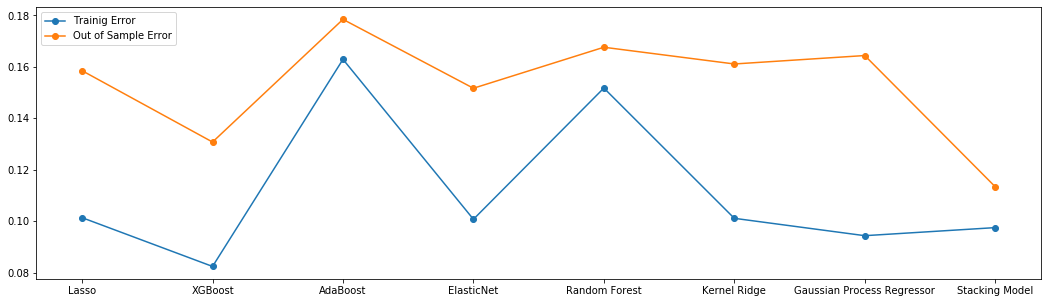

In [60]:
plt.figure(figsize = (18,5))
plt.plot(['Lasso','XGBoost','AdaBoost','ElasticNet','Random Forest','Kernel Ridge','Gaussian Process Regressor','Stacking Model'],
         result['In-sample Error'],marker='o',label='Trainig Error')
plt.plot(['Lasso','XGBoost','AdaBoost','ElasticNet','Random Forest','Kernel Ridge','Gaussian Process Regressor','Stacking Model'],
         result['Out-of-sample Error'],marker='o',label='Out of Sample Error')
plt.legend(loc="upper left")